In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv(r"G:\Users\HP\titanic.csv",sep="\t")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  156 non-null    int64  
 1   Survived     156 non-null    int64  
 2   Pclass       156 non-null    int64  
 3   Name         156 non-null    object 
 4   Sex          156 non-null    object 
 5   Age          126 non-null    float64
 6   SibSp        156 non-null    int64  
 7   Parch        156 non-null    int64  
 8   Ticket       156 non-null    object 
 9   Fare         156 non-null    float64
 10  Cabin        31 non-null     object 
 11  Embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 14.8+ KB


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             30
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          125
Embarked         1
dtype: int64

In [7]:
df['Sex'].value_counts()

male      100
female     56
Name: Sex, dtype: int64

In [8]:
import seaborn as sns

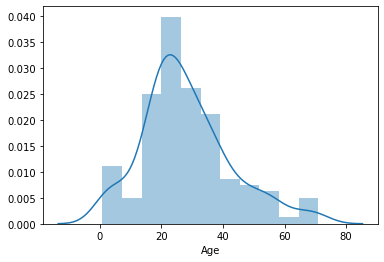

In [9]:
sns.distplot(df['Age'].dropna())

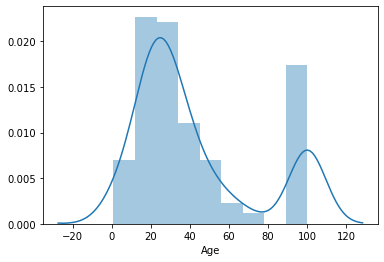

In [10]:
sns.distplot(df['Age'].fillna(100))

#### Gaussian Distributed

Text(0, 0.5, 'No of Passenger')

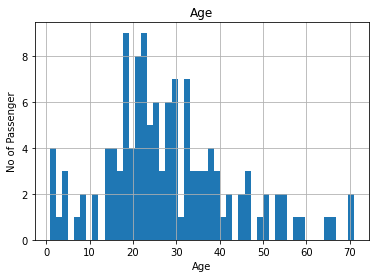

In [11]:
figure= df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of Passenger')

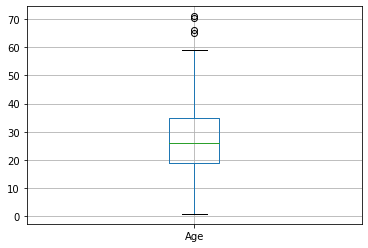

In [12]:
figure=df.boxplot(column='Age')

In [13]:
df['Age'].describe()

count    126.000000
mean      28.141508
std       14.613880
min        0.830000
25%       19.000000
50%       26.000000
75%       35.000000
max       71.000000
Name: Age, dtype: float64

In [14]:
### Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outlier

upper_boundary= df['Age'].mean() + 3*df['Age'].std()
lower_boundary= df['Age'].mean() - 3*df['Age'].std()
print(lower_boundary),print(upper_boundary),print(df['Age'].mean())

-15.700131843174447
71.98314771619032
28.141507936507935


(None, None, None)

In [15]:
### Lets compute the inter quartile rane to calculate the boundaries
IQR= df.Age.quantile(0.75)-df.Age.quantile(0.25)

In [16]:
IQR

16.0

In [17]:
lower_bridge= df['Age'].quantile(0.25)-(IQR*1.5)
upper_bridge= df['Age'].quantile(0.75)+(IQR*1.5)
print(lower_bridge),print(upper_bridge)

-5.0
59.0


(None, None)

### For Extrem Outlier

In [18]:
lower_bridge= df['Age'].quantile(0.25)-(IQR*3)
upper_bridge= df['Age'].quantile(0.75)+(IQR*3)
print(lower_bridge),print(upper_bridge)

-29.0
83.0


(None, None)

### feature is Skewed

Text(0, 0.5, 'No of Passenger')

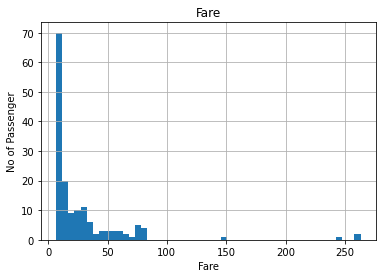

In [19]:
figure= df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of Passenger')

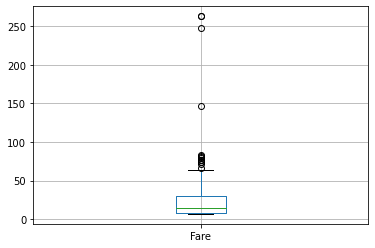

In [20]:
figure= df.boxplot(column='Fare')

In [21]:
df['Fare'].describe()

count    156.000000
mean      28.109587
std       39.401047
min        6.750000
25%        8.003150
50%       14.454200
75%       30.371850
max      263.000000
Name: Fare, dtype: float64

In [22]:
#### Lets compute the Interquantile range to calculate the boundaries

IQR= df.Fare.quantile(0.75)-df.Fare.quantile(0.25)

In [23]:
lower_bridge= df['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge= df['Fare'].quantile(0.75)+(IQR*1.5)
print(lower_bridge),print(upper_bridge)

-25.549900000000008
63.92490000000001


(None, None)

In [24]:
lower_bridge= df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge= df['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge),print(upper_bridge)

-59.102950000000014
97.47795000000002


(None, None)

#### Outlier treatment

In [25]:
data= df.copy()

In [31]:
data.loc[data['Age']>=73,'Age']=73

In [32]:
data.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [33]:
data.loc[data['Fare']>=100,'Fare']=100

In [36]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C


Text(0, 0.5, 'No of passenger')

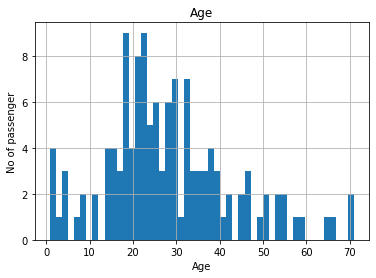

In [39]:
figure= data.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

Text(0, 0.5, 'No of passenger')

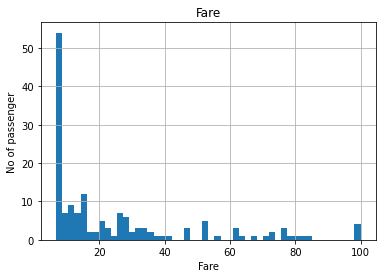

In [38]:
figure= data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=.30,random_state=0)

In [64]:
### Logitic Regression
from sklearn.linear_model import LogisticRegression
cls= LogisticRegression()
cls.fit(X_train,y_train)
y_pred= cls.predict(X_test)
y_pred1= cls.predict_proba(X_test)   

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {} ".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy Score: 0.6170212765957447
roc_auc_score: 0.529040404040404 


In [65]:
# random Forest
from sklearn.ensemble import RandomForestClassifier
cls= RandomForestClassifier()
cls.fit(X_train,y_train)
y_pred= cls.predict(X_test)
y_pred1= cls.predict_proba(X_test)   

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {} ".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy Score: 0.574468085106383
roc_auc_score: 0.5618686868686869 
